#  Predict Bank Marketing Campaign Results
### Goal
The classification goal is to predict if the client will subscribe a term deposit (variable `y`). We will be using Naive Bayes and Neural Net models, comparing which is more efficient.

In [2]:
#import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Source: Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

In [3]:
#import data
data = pd.read_csv("bank-full.csv",sep=";", header=0)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<h3>
    <center>
The data is a mix of different variables such as categorical features and numeric features. Ultimately, we will need to encode all categorical and binay features and scale numeric features to use naive bayes model. Below is a table I built to further describe the dataset we are working with.
</center>
    </h3>

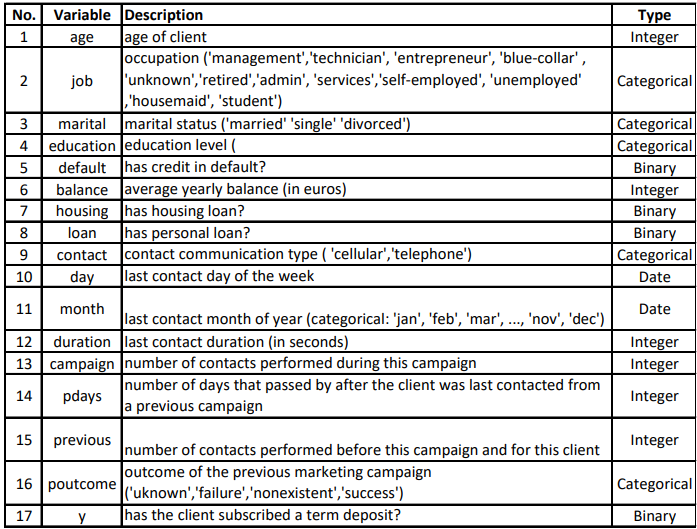

In [7]:
# Check for NULL values
data.isnull().sum(axis=0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Check to see if Data is balanced
data['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

The Data is heavily unbalanced, something we will address shortly. Next, we will pre-process the data first, then split.

## Pre-Processing

In [9]:
#Seperate Dataframe based on their data type
categorical_cols = ['job','marital','education','day','contact','month','poutcome']
binary_cols = ['default','housing','loan']
numerical_cols = ['age','balance','duration','campaign','pdays','previous']
target = data['y']

In [10]:
# import pre-processing libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
le = LabelEncoder()

In [11]:
# Encode 'y' target to binary
target = le.fit_transform(target)

In [12]:
features = data[categorical_cols + binary_cols + numerical_cols]
# We will use one-hot encoding using `pd.get_dummies`
encoded_features = pd.get_dummies(features, columns=categorical_cols)
features

,job,marital,education,day,contact,month,poutcome,default,housing,loan,age,balance,duration,campaign,pdays,previous
0,management,married,tertiary,5,unknown,may,unknown,no,yes,no,58,2143,261,1,-1,0
1,technician,single,secondary,5,unknown,may,unknown,no,yes,no,44,29,151,1,-1,0
2,entrepreneur,married,secondary,5,unknown,may,unknown,no,yes,yes,33,2,76,1,-1,0
3,blue-collar,married,unknown,5,unknown,may,unknown,no,yes,no,47,1506,92,1,-1,0
4,unknown,single,unknown,5,unknown,may,unknown,no,no,no,33,1,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,17,cellular,nov,unknown,no,no,no,51,825,977,3,-1,0
45207,retired,divorced,primary,17,cellular,nov,unknown,no,no,no,71,1729,456,2,-1,0
45208,retired,married,secondary,17,cellular,nov,success,no,no,no,72,5715,1127,5,184,3
45209,blue-collar,married,secondary,17,telephone,nov,unknown,no,no,no,57,668,508,4,-1,0


In [13]:
#Scale Numerical Values
encoded_features[numerical_cols] = scaler.fit_transform(encoded_features[numerical_cols])
#Encode Binary Values
for cols in binary_cols:
    encoded_features[cols] = le.fit_transform(encoded_features[cols])

### Final Result from our Pre-Processing:

In [14]:
encoded_features

,default,housing,loan,age,balance,duration,campaign,pdays,previous,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.251940,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.251940,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,1,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.251940,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.251940,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.251940,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0.947747,-0.176460,2.791329,0.076230,-0.411453,-0.251940,0,...,0,0,0,1,0,0,0,0,0,1
45207,0,0,0,2.831227,0.120447,0.768224,-0.246560,-0.411453,-0.251940,0,...,0,0,0,1,0,0,0,0,0,1
45208,0,0,0,2.925401,1.429593,3.373797,0.721811,1.436189,1.050473,0,...,0,0,0,1,0,0,0,0,1,0
45209,0,0,0,1.512791,-0.228024,0.970146,0.399020,-0.411453,-0.251940,0,...,0,0,0,1,0,0,0,0,0,1


## Split Training and Test Data
Now we will split our data into out training data and testing data. To do this we will call on ski-learn built in `train_test_split` function. Each time this function is called it chooses a `random_state` so we will lock it at `33` and will split the data 0.8/0.2. 

In [15]:
from sklearn.model_selection import train_test_split
#Split Data and Kept Random State = 33
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=33) 

In [16]:
X_train

,default,housing,loan,age,balance,duration,campaign,pdays,previous,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
29068,0,1,0,-0.370689,-0.214887,-0.804439,-0.569351,-0.411453,-0.251940,0,...,0,0,0,0,0,0,0,0,0,1
32617,0,1,0,1.324443,-0.057566,-0.563685,-0.569351,2.784468,0.616335,0,...,0,0,0,0,0,0,1,0,0,0
30325,0,0,0,-1.406602,-0.222441,0.504172,-0.569351,-0.411453,-0.251940,1,...,0,0,0,0,0,0,0,0,0,1
3887,0,1,0,0.759399,-0.442164,-0.253036,2.658552,-0.411453,-0.251940,0,...,0,0,1,0,0,0,0,0,0,1
22263,0,0,0,1.512791,-0.447419,0.527471,0.076230,-0.411453,-0.251940,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27282,0,0,0,-0.841558,1.756387,-0.816088,-0.569351,-0.411453,-0.251940,0,...,0,0,0,1,0,0,0,0,0,1
578,0,1,0,1.136095,-0.439208,0.030432,0.076230,-0.411453,-0.251940,0,...,0,0,1,0,0,0,0,0,0,1
38616,0,1,1,0.194355,-0.534783,-0.955880,0.721811,-0.411453,-0.251940,0,...,0,0,1,0,0,0,0,0,0,1
2439,0,1,0,0.382703,1.078495,-0.544270,-0.569351,-0.411453,-0.251940,0,...,0,0,1,0,0,0,0,0,0,1


### Use `SMOTE` to fix imbalanced data issue
`SMOTE` (Synthetic Minority Oversampling Technique) is an oversampling technique that uses K-NN to create "synthetic" values for the minority data. In this case, we can see the minority are "Yes" results. 

In [17]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=33)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [18]:
from collections import Counter
#Before SMOTE
Counter(y_train)

Counter({0: 31928, 1: 4240})

In [19]:
#After SMOTE
Counter(y_train_sm)

Counter({0: 31928, 1: 31928})

## Build Naive Bayes Model

In [20]:
#Import Naive Bayes Model and Metric Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
model = GaussianNB()
model.fit(X_train_sm,y_train_sm)

GaussianNB()

In [26]:
yhattrain = model.predict(X_train_sm)
CM_train = confusion_matrix(yhattrain, y_train_sm)
ACC_train = accuracy_score(yhattrain, y_train_sm)

Accuracy Score: 0.8239789526434478


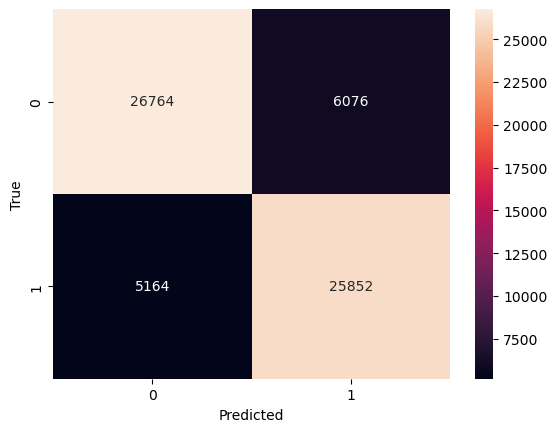

In [27]:
print("Accuracy Score:", ACC_train)
sns.heatmap(CM_train, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
from sklearn.metrics import precision_score, f1_score
precision = precision_score(y_train_sm, yhattrain)
f1 = f1_score(y_train_sm, yhattrain)
print("Precision:", precision)
print("F1-Score: ", f1)

Precision: 0.8335052875935002
F1-Score:  0.8214285714285715


In [38]:
yhattest = model.predict(X_test)
yhattest_probas = model.predict_proba(X_test)[:,1]
CM_test = confusion_matrix(yhattest,y_test)
ACC_test = accuracy_score(yhattest, y_test)

Accuracy Score: 0.8034944155700542


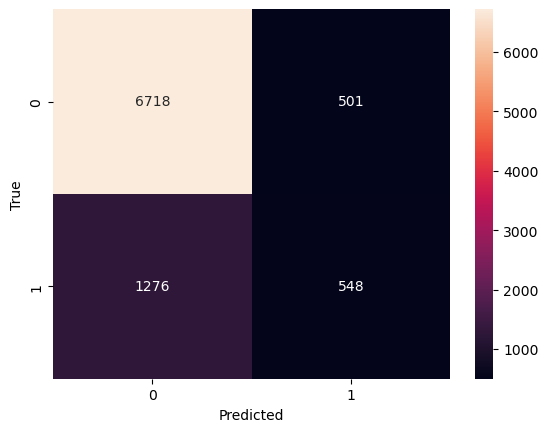

In [39]:
print("Accuracy Score:", ACC_test)
sns.heatmap(CM_test, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Build Neural Net Model
We will use `Keras` and build a basic Neural Net. 

In [40]:
# Import Libraries
from keras.models import Sequential
from keras.layers import Dense

In [41]:
# Build model based for binary classification
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_sm.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(X_train_sm, y_train_sm, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


1996/1996 [==============================] - 11s 4ms/step - loss: 0.2168 - accuracy: 0.9124 - val_loss: 0.2328 - val_accuracy: 0.8970
Epoch 2/10
1996/1996 [==============================] - 13s 7ms/step - loss: 0.1478 - accuracy: 0.9381 - val_loss: 0.2263 - val_accuracy: 0.8970
Epoch 3/10
1996/1996 [==============================] - 13s 6ms/step - loss: 0.1346 - accuracy: 0.9419 - val_loss: 0.2206 - val_accuracy: 0.8994
Epoch 4/10
1996/1996 [==============================] - 8s 4ms/step - loss: 0.1275 - accuracy: 0.9451 - val_loss: 0.2244 - val_accuracy: 0.8980
Epoch 5/10
1996/1996 [==============================] - 10s 5ms/step - loss: 0.1215 - accuracy: 0.9462 - val_loss: 0.2347 - val_accuracy: 0.8976
Epoch 6/10
1996/1996 [==============================] - 14s 7ms/step - loss: 0.1177 - accuracy: 0.9487 - val_loss: 0.2265 - val_accuracy: 0.8978
Epoch 7/10
1996/1996 [==============================] - 10s 5ms/step - loss: 0.1148 - accuracy: 0.9499 - val_loss: 0.2336 - val_a

In [44]:
results = model.evaluate(X_test, y_test)
results

283/283 [==============================] - 1s 3ms/step - loss: 0.2198 - accuracy: 0.9006


[0.2197556495666504, 0.9005860686302185]

### It Appears that the Neural Net Model has better results, than the Naive Bayes Model. Lets take a closer look and compare the two by looking at their ROC Curves.

In [45]:
# Import Libraries
from sklearn.metrics import roc_curve, auc
# Build ROC Curve and AUC for NN
y_pred = model.predict(X_test).ravel()
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred)
auc_nn = auc(fpr_nn, tpr_nn)

283/283 [==============================] - 1s 4ms/step


In [48]:
# Build ROC Curve and AUC for NB
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, yhattest_probas)
auc_nb = auc(fpr_nb, tpr_nb)

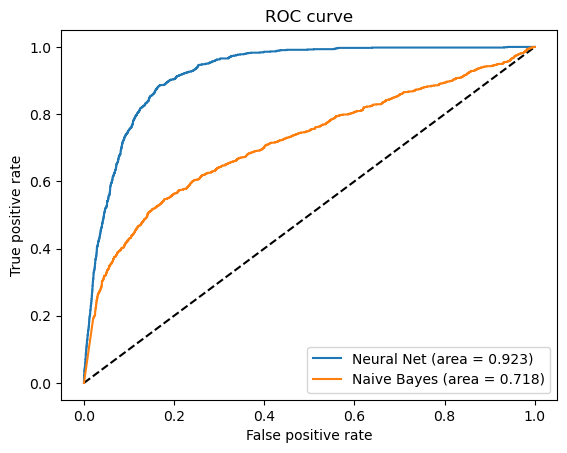

In [49]:
#Graph Each Curve to Compare
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn, tpr_nn, label='Neural Net (area = {:.3f})'.format(auc_nn))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (area = {:.3f})'.format(auc_nb))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Conclusion
Naive Bayes was accurate, but still struggled despite using SMOTE. The clear winner is the Neural Net Model with pretty outstanding results. 